目前使用LOP為定義之實驗數據採用33筆，多變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
datafile = u"/root/LR_ML/FinalDataAnalysis.xlsx"
TIP0 = pd.read_excel(datafile)

In [3]:
TIP = pd.DataFrame(TIP0)

In [4]:
TIP.head()

,SBPI,SBPL,DBPI,DBPL,BPMI,BPML,LOP
0,116,113,73,71,72,77,118.6
1,132,138,68,81,74,78,130.6
2,105,106,68,63,85,81,107.3
3,114,112,66,64,71,79,119.6
4,133,139,85,87,83,87,144.3


In [5]:
modTIP = TIP
modTIP1 = pre.MinMaxScaler(feature_range=(0, 1))
modTIP2 = modTIP1.fit_transform(modTIP.drop(['LOP'], axis = 1))
print("\nMin max scaled data:\n", modTIP2)
modTIP3 = pd.DataFrame(modTIP2, columns = ['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'])
modTIP3['LOP'] = TIP['LOP']



Min max scaled data:
 [[0.27272727 0.26190476 0.2972973  0.33333333 0.24242424 0.40625   ]
 [0.63636364 0.85714286 0.16216216 0.63636364 0.3030303  0.4375    ]
 [0.02272727 0.0952381  0.16216216 0.09090909 0.63636364 0.53125   ]
 [0.22727273 0.23809524 0.10810811 0.12121212 0.21212121 0.46875   ]
 [0.65909091 0.88095238 0.62162162 0.81818182 0.57575758 0.71875   ]
 [0.70454545 0.61904762 0.72972973 0.96969697 0.84848485 0.8125    ]
 [0.20454545 0.19047619 0.05405405 0.24242424 0.18181818 0.34375   ]
 [0.31818182 0.5952381  0.21621622 0.45454545 0.45454545 0.3125    ]
 [0.27272727 0.4047619  0.24324324 0.33333333 0.         0.375     ]
 [0.45454545 0.52380952 0.64864865 0.48484848 0.84848485 0.71875   ]
 [0.22727273 0.16666667 0.21621622 0.03030303 0.36363636 0.21875   ]
 [0.18181818 0.26190476 0.         0.33333333 0.45454545 0.375     ]
 [0.47727273 0.28571429 0.         0.18181818 0.36363636 0.4375    ]
 [0.13636364 0.0952381  1.         0.06060606 0.48484848 0.34375   ]
 [0.2272727

             SBPI        SBPL       DBPI       DBPL       BPMI       BPML  \
count   34.000000   34.000000  34.000000  34.000000  34.000000  34.000000   
mean   120.470588  119.911765  74.529412  74.029412  80.411765  80.735294   
std     10.935722   12.041262  11.152484   9.858039   9.680088   8.147537   
min    104.000000  102.000000  62.000000  60.000000  64.000000  64.000000   
25%    113.000000  110.000000  67.000000  68.000000  73.000000  76.000000   
50%    116.000000  117.500000  71.000000  72.000000  79.000000  78.000000   
75%    129.500000  126.750000  84.750000  79.000000  88.750000  87.000000   
max    148.000000  144.000000  99.000000  93.000000  97.000000  96.000000   

              LOP  
count   34.000000  
mean   121.179412  
std     12.128049  
min    106.400000  
25%    111.350000  
50%    118.400000  
75%    127.125000  
max    148.400000  
SBPI    0
SBPL    0
DBPI    0
DBPL    0
BPMI    0
BPML    0
LOP     0
dtype: int64
          SBPI      SBPL      DBPI      DBP

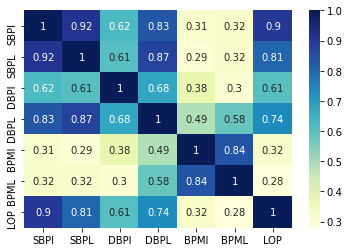

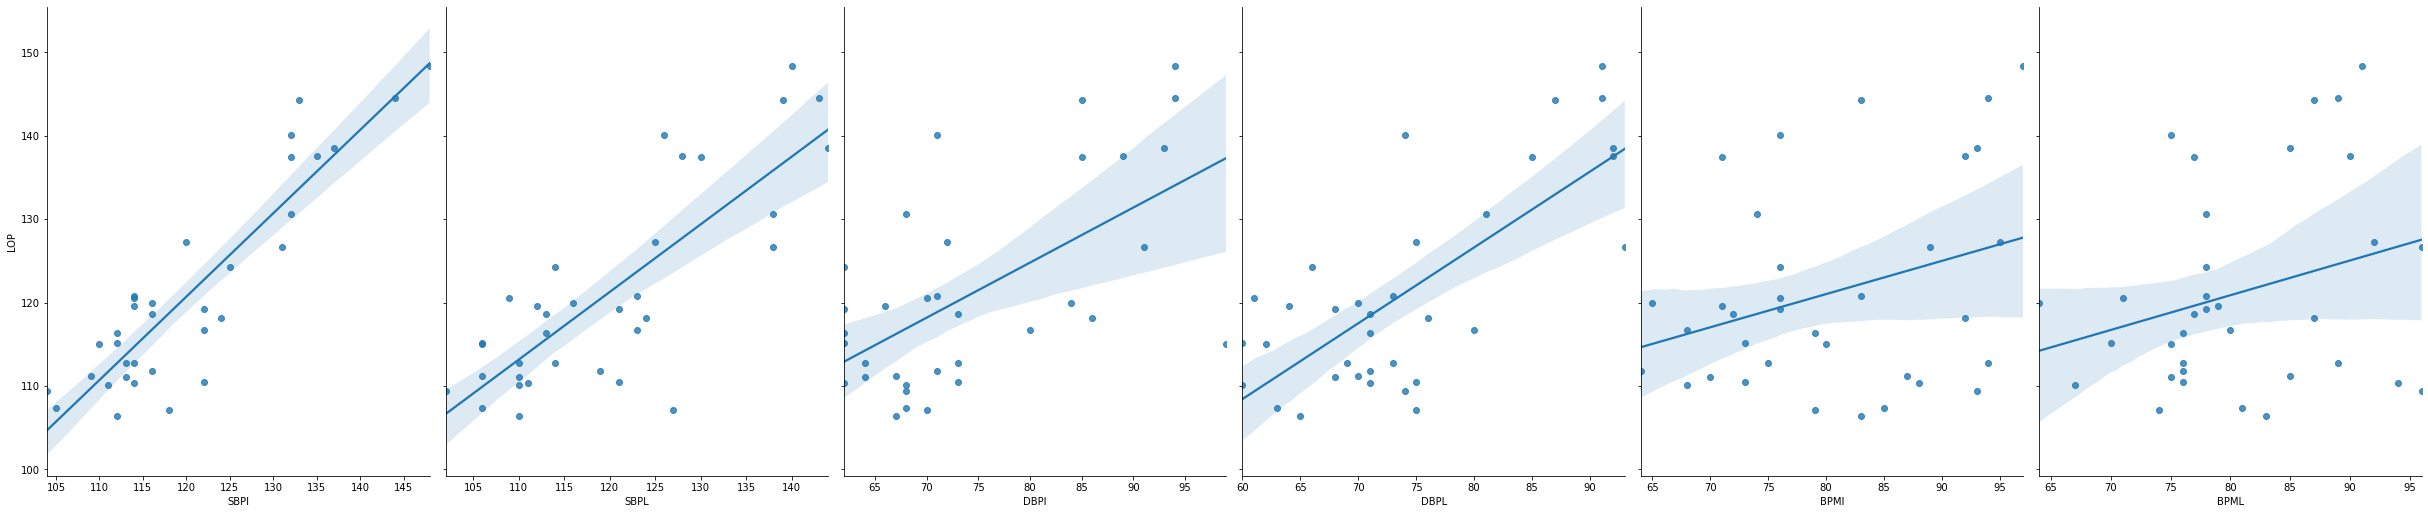

In [6]:
#檢驗數據
print(modTIP.describe())#數據描述，會顯示最值，平均數等信息，可以簡單判斷數據中是否有異常值
print(TIP[TIP.isnull()==True].count())#檢驗缺失值，若輸出爲0，說明該列沒有缺失值
#輸出相關係數，判斷是否值得做線性迴歸模型
print(modTIP.corr())#0-0.3弱相關；0.3-0.6中相關；0.6-1強相關；
sns.heatmap(modTIP.corr(),annot=True, cmap="YlGnBu")
sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# sns.pairplot(modTIP, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot.png")
# plt.show()
# print(modTIP3.describe())
# print(modTIP3.corr())
# H = sns.heatmap(modTIP3.corr(),annot=True, cmap="YlGnBu")
#通過seaborn添加一條最佳擬合直線和95%的置信帶，直觀判斷相關關係
# P = sns.pairplot(modTIP3, x_vars=['SBPI','SBPL','DBPI','DBPL','BPMI','BPML'], y_vars='LOP', height=7, aspect=0.8, kind='reg')
# H
# F.savefig(u"/root/LR_ML/modData_Sorted4_correlation.png")
# plt.savefig(u"/root/LR_ML/modData_Sorted4_pairplot_normalization.png")
# plt.show()

自變量---源數據: (34, 2) ；  訓練集: (27, 2) ；  測試集: (7, 2)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
擬合參數:截距 3.8081924767750195 ,迴歸係數： [0.91228619 0.09632204]
最佳擬合線: Y =  3.81 + 0.91 * SBPI +  0.1 * DBPI


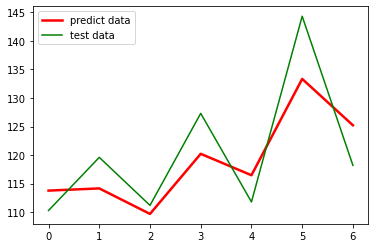

1.0
5.736289770402594
自變量---源數據: (34, 2) ；  訓練集: (27, 2) ；  測試集: (7, 2)
因變量---源數據: (34,) ；  訓練集: (27,) ；  測試集: (7,)
擬合參數:截距 24.37610568820611 ,迴歸係數： [0.62009294 0.29970164]
最佳擬合線: Y =  24.38 + 0.62 * SBPL +  0.3 * DBPL


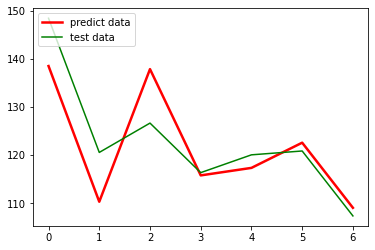

1.0
5.444667607802832


In [7]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.drop(['SBPL','DBPL','BPMI','BPML'],axis=1).iloc[:,0:2],modTIP.LOP,train_size=0.8)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.drop(['SBPL','DBPL','BPMI','BPML'],axis=1).iloc[:,0:2].shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#調用線性規劃包
model = LinearRegression()
model.fit(X_train,Y_train)#線性迴歸訓練
a  = model.intercept_#截距
b = model.coef_#迴歸係數
print("擬合參數:截距",a,",迴歸係數：",b)
#顯示線性方程，並限制參數的小數位爲兩位
print("最佳擬合線: Y = ",round(a,2),"+",round(b[0],2),"* SBPI + ",round(b[1],2),"* DBPI")
Y_pred = model.predict(X_test)#對測試集數據，用predict函數預測
plt.plot(range(len(Y_pred)),Y_pred,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test)),Y_test,'green',label="test data")
plt.legend(loc=2)
plt.show()#顯示預測值與測試值曲線
print(model.score(X_test,Y_pred))#R square
# print(mean_squared_error(Y_test, Y_pred))
print(mean_absolute_error(Y_test, Y_pred))

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(modTIP.drop(['SBPI','DBPI','BPMI','BPML'],axis=1).iloc[:,0:2],modTIP.LOP,train_size=0.8)
print("自變量---源數據:",modTIP.drop(['SBPI','DBPI','BPMI','BPML'],axis=1).iloc[:,0:2].shape, "；  訓練集:",X_train1.shape, "；  測試集:",X_test1.shape)
print("因變量---源數據:",TIP.LOP.shape, "；  訓練集:",Y_train1.shape, "；  測試集:",Y_test1.shape)
model1 = LinearRegression()
model1.fit(X_train1,Y_train1)
c  = model1.intercept_
d = model1.coef_
print("擬合參數:截距",c,",迴歸係數：",d)
print("最佳擬合線: Y = ",round(c,2),"+",round(d[0],2),"* SBPL + ",round(d[1],2),"* DBPL")
Y_pred1 = model1.predict(X_test1)
plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
plt.legend(loc=2)
# plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
plt.show()
print(model1.score(X_test1,Y_pred1))#R square
# print(mean_squared_error(Y_test1, Y_pred1))
print(mean_absolute_error(Y_test1, Y_pred1))

In [8]:
# print("擬合參數:截距",c,",迴歸係數：",d)
# print("最佳擬合線: Y = ",round(c,2),"+",round(d[0],2),"* X1 + ",round(d[1],2),"* X2 + ",round(d[2],2), "* X3")
# Y_pred1 = model1.predict(X_test1)
# plt.plot(range(len(Y_pred1)),Y_pred1,'red', linewidth=2.5,label="predict data")
# plt.plot(range(len(Y_test1)),Y_test1,'green',label="test data")
# plt.legend(loc=2)
# # plt.savefig(u"/root/LR_ML/modData_Sorted4_evaluation.png")
# plt.show()

In [9]:
# from sklearn import linear_model
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
# from sklearn.datasets import make_regression

# model2 = make_pipeline(PolynomialFeatures(2),linear_model.LinearRegression())
# model2.fit(X_train,Y_train)
# plt.scatter(X_train,Y_train)
# plt.plot(X_train,model.predict(X_train),color='red')